# Lending Club EDA

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Reading the data into a Pandas df
df = pd.read_csv("data/loan.csv")

C:\Users\abhir\AppData\Local\Temp\ipykernel_9708\3598531694.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/loan.csv")


In [3]:
# Inspecting the data
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
df.shape

(39717, 111)

In [5]:
# Dropping unnecessary id columns
df.drop(['id', 'member_id'], axis = 1, inplace = True)
df.shape

(39717, 109)

#### For the purpose of analysis, we will not consider the loans which are still in Current status since we cannot consider them to be either default or not default

In [6]:
df = df[df['loan_status'] != 'Current']
df.shape

(38577, 109)

#### Adding user defined functions for repetitive tasks

In [7]:
# A function to retrieve the data types for each column in a Pandas DataFrame

def get_metadata(df):
    metadata = {}
    unique_count = []
    for (col, dtype, null_count) in zip(df.columns, df.dtypes, df.isnull().sum()):
        metadata[col] = (dtype, null_count)
        unique_count.append(df[col].nunique())
    
    columns = []
    dtypes = []
    nulls = []
    for key,value in metadata.items():
        columns.append(key)
        dtypes.append(value[0])
        nulls.append(value[1])
    
    data = {"column_name":columns,"data_type":dtypes, "null_count":nulls, "unique_count":unique_count}
    df_metadata = pd.DataFrame(data)
    return df_metadata

In [8]:
# A funciton to print two values passed as arguments along with the percentage difference between them

def print_vals(x,y):
    print(f"df1:{x}")
    print(f"df2:{y}")
    diff = ((y-x)/x)*100
    print(f"difference = {diff}")

In [9]:
# A function to compare descriptive stats for the same column in two Pandas DataFrames

def compare_numerical_column(df1, df2, column_name):
    arr1 = np.array(df1[column_name])
    arr2 = np.array(df2[column_name])
    # All value differences are calculated as (((value in df2)-(value in df1))/(value in df1))*100
    print("Min:")
    print_vals(np.min(arr1),np.min(arr2))
    print("Max:")
    print_vals(np.max(arr1),np.max(arr2))
    print("Mean:")
    print_vals(np.mean(arr1),np.mean(arr2))
    print("25th percentile:")
    print_vals(np.percentile(arr1, 25),np.percentile(arr2, 25))
    print("Median:")
    print_vals(np.median(arr1),np.median(arr2))
    print("75th percentile:")
    print_vals(np.percentile(arr1, 75),np.percentile(arr2, 75))

In [10]:
# A function to plot side by side boxplots and then histograms for the same column in two Pandas DataFrames

def plot_numerical_cols(df1, df2, column_name):
    x = 'loan_status'
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))

    axs[0, 0].boxplot([df1[column_name], df2[column_name]], patch_artist=True, boxprops=dict(facecolor='lightblue'))
    axs[0, 0].set_xticklabels([f'{df1[x][0]}', f'{df2[x][0]}'])
    axs[0, 0].set_ylabel(column_name)
    axs[0, 0].set_title('Side-by-Side Boxplot')

    axs[1, 0].hist(df1[column_name], bins=10, alpha=0.5, color='skyblue', label=f'Histogram ({df1[x][0]})')
    axs[1, 0].set_xlabel(column_name)
    axs[1, 0].set_ylabel('Frequency')
    axs[1, 0].set_title(f"{df1[x][0]}")

    axs[1, 1].hist(df2[column_name], bins=10, alpha=0.5, color='lightgreen', label=f'Histogram ({df2[x][0]})')
    axs[1, 1].set_xlabel(column_name)
    axs[1, 1].set_ylabel('Frequency')
    axs[1, 1].set_title(f"{df2[x][0]}")

    plt.subplots_adjust(hspace=0.3, wspace=0.3)
    plt.show()

In [11]:
# A function to create a pivot table using a categorical variable as index, loan_status as columns and the percentage of values in each category as values

def get_pivot_table(df, pivot_col, val_col, aggfunc):
    if col != 'loan_status':
        print(f'Bivariate analysis of spread of values of {pivot_col} vs loan_status')
        df_pivot = df.pivot_table(values = f'{val_col}', index = f'{pivot_col}', columns = 'loan_status', aggfunc = f'{aggfunc}')
        print(df_pivot)

In [12]:
def get_perc_pivot_table(df, col):
    if col != 'loan_status':
        print(f'Bivariate analysis of spread of values of {col} vs loan_status')
        df_pivot = df.pivot_table(values = 'annual_inc', index = f'{col}', columns = 'loan_status', aggfunc = 'count')
        df_pivot['Charged Off'] = df_pivot['Charged Off'].divide(len(df[df['loan_status'] == 'Charged Off']))
        df_pivot['Fully Paid'] = df_pivot['Fully Paid'].divide(len(df[df['loan_status'] == 'Fully Paid']))
        df_pivot = df_pivot.multiply(100)
        print(df_pivot)

In [13]:
# A function to remove outliers from a numerical column
# Outliers are defined as values lying outside -3 standard deviations to +3 standard deviations from the mean

def remove_outliers(df,col):
    arr = np.array(df[col])
    mean = np.mean(arr)
    std = np.std(arr)
    df = df[(df[col] <= mean+(3*std)) & (df[col] >= mean-(3*std))]
    return df

#### Discovering and dealing with data issues
#### The following steps will be taken for this part of the analysis
    * Converting date columns to Pandas DateTime type
    * Converting percentage columns to numerical type after removing the % symbol
    * Removing columns which contain more than 10% of values missing
    * Removing columns which contain only a single unique value since they will not be of use in analysis 
    * Dropping missing values where it does not make logical sense to impute them (Ex. dates, derived columns)
    * Dropping missing values where imputing them with mean/median/mode will heavily skew the data
    * Imputing missing values where feasible
    * Converting numeric columns to categorical where feasible
    * Removing outliers from all the numerical columns

#### Step 1: Converting date columns to Pandas DateTime type
The columns issue_d, last_pymnt_d and last_credit_pull_d contain month-year formatted data. Converting them to Pandas DateTime objects will set their day component to 01 for each month.
This will not cause any issues since any analysis will be done on month level granularity.

In [14]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%y')
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%y')
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')

#### Step 2: Converting percentage columns to numerical type after removing the % symbol
This applies to the columns int_rate and revol_util, both of which contain percentage values

In [15]:
df['int_rate'] = df['int_rate'].apply(lambda x: x[:-1]).astype('float64')

In [16]:
'''
Since revol_util is calculated based on all available credit lines, imputing a value does not make logical sense so we will drop the null values and then convert it to a float for further analysis
'''
df.dropna(subset = ['revol_util'], inplace = True)
df.shape

(38527, 109)

In [17]:
df['revol_util'] = df['revol_util'].apply(lambda x: x[:-1]).astype('float64')

#### Step 3: removing columns which contain more than 10% of values missing

In [18]:
df_metadata = get_metadata(df)
df_metadata

,column_name,data_type,null_count,unique_count
0,loan_amnt,int64,0,869
1,funded_amnt,int64,0,1018
2,funded_amnt_inv,float64,0,8040
3,term,object,0,2
4,int_rate,float64,0,370
...,...,...,...,...
104,tax_liens,float64,39,1
105,tot_hi_cred_lim,float64,38527,0
106,total_bal_ex_mort,float64,38527,0
107,total_bc_limit,float64,38527,0


In [19]:
# Calculating percentage of missing values
df_metadata['null_percentage'] = (df_metadata['null_count']/df.shape[0])*100

In [20]:
df_metadata['null_percentage'].value_counts()

100.000000    55
0.000000      42
0.145353       2
6.182677       1
2.673450       1
32.473330      1
0.028551       1
64.546941      1
92.893296      1
0.173904       1
0.005191       1
1.809121       1
0.101228       1
Name: null_percentage, dtype: int64

In [21]:
# If a column has 10% or more of it's values missing, replacing them may skew the data and, therefore, the column is dropped
df_metadata = df_metadata[df_metadata['null_percentage'] >= 10]

In [22]:
columns_to_remove = df_metadata['column_name'].to_list()
len(columns_to_remove)

58

In [23]:
df.drop(columns_to_remove, axis = 1, inplace = True)
df.shape

(38527, 51)

#### Step 4: Removing columns which contain only a single unique value

In [24]:
df_metadata = get_metadata(df)

In [25]:
# If a column has only one unique value, it will not influence the loan_status. Thus we drop all column which have a single unique value
df_metadata = df_metadata[df_metadata['unique_count'] == 1]
columns_to_remove = df_metadata['column_name'].to_list()
len(columns_to_remove)

11

In [26]:
df.drop(columns_to_remove, axis = 1, inplace = True)

#### Step 5: Dropping missing values where it does not make logical sense to impute them (Ex. dates, derived columns)

In [27]:
df_metadata = get_metadata(df)
df_metadata

,column_name,data_type,null_count,unique_count
0,loan_amnt,int64,0,869
1,funded_amnt,int64,0,1018
2,funded_amnt_inv,float64,0,8040
3,term,object,0,2
4,int_rate,float64,0,370
5,installment,float64,0,15002
6,grade,object,0,7
7,sub_grade,object,0,35
8,emp_title,object,2382,27988
9,emp_length,object,1030,11


In [28]:
"""
Logically, it does not make sense to impute a date value since it would simply increase the weightage on a specific date with no real reasonable backing. 
Thus, we will drop the missing dates in last_pymnt_d
"""
df.dropna(subset=['last_pymnt_d'], inplace = True)

#### Step 6: Dropping missing values where imputing them with mean/median/mode will heavily skew the data

In [29]:
df['emp_title'].value_counts()

US Army                130
Bank of America        107
IBM                     65
AT&T                    57
Kaiser Permanente       56
                      ... 
apro                     1
Precision Auto Tune      1
BOEMRE                   1
Collins Stewart LLC      1
Evergreen Center         1
Name: emp_title, Length: 27941, dtype: int64

In [30]:
"""
If we replace the missing values with the mode for emp_title, the frequency of the mode will increase from 131 to 2517
This could potentially lead to incorrect insights. Therefore, we will be dropping the missing values for emp_title.
"""
df.dropna(subset=['emp_title'], inplace = True)

#### Step 7: Imputing missing values where feasible

In [31]:
df_metadata = get_metadata(df)
df_metadata

,column_name,data_type,null_count,unique_count
0,loan_amnt,int64,0,858
1,funded_amnt,int64,0,1008
2,funded_amnt_inv,float64,0,7658
3,term,object,0,2
4,int_rate,float64,0,368
5,installment,float64,0,14428
6,grade,object,0,7
7,sub_grade,object,0,35
8,emp_title,object,0,27941
9,emp_length,object,55,11


In [32]:
df['emp_length'].value_counts()

10+ years    8147
2 years      4167
< 1 year     4109
3 years      3890
4 years      3253
5 years      3078
1 year       3052
6 years      2095
7 years      1659
8 years      1386
9 years      1194
Name: emp_length, dtype: int64

In [33]:
# For emp_length we can impute with the mode

df['emp_length'].fillna('10+ years', inplace = True)

In [34]:
df['title'].value_counts()

Debt Consolidation           1997
Debt Consolidation Loan      1546
Personal Loan                 613
Consolidation                 473
debt consolidation            447
                             ... 
Timeshare Loan                  1
My Relief                       1
Goodbye struggle                1
Ro's Loan                       1
Retiring credit card debt       1
Name: title, Length: 18074, dtype: int64

In [35]:
# Since the number of missing values in title is very smmall, we can replace it with the mode

df['title'].fillna('Debt Consolidation', inplace = True)

In [36]:
df['pub_rec_bankruptcies'].value_counts()

0.0    33957
1.0     1469
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [37]:
#Since pub_rec_bankruptcies has only 3 values, we can treat it as a categorical variable and impute the missing values with the mode

df['pub_rec_bankruptcies'].fillna(0.0, inplace = True)

In [38]:
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].astype(str)

In [39]:
df_metadata = get_metadata(df)
df_metadata

,column_name,data_type,null_count,unique_count
0,loan_amnt,int64,0,858
1,funded_amnt,int64,0,1008
2,funded_amnt_inv,float64,0,7658
3,term,object,0,2
4,int_rate,float64,0,368
5,installment,float64,0,14428
6,grade,object,0,7
7,sub_grade,object,0,35
8,emp_title,object,0,27941
9,emp_length,object,0,11


#### Step 8: Converting numeric columns to categorical where feasible
Like the column pub_rec_bankruptcies, there may be other numerical columns which contain a very small number of unique values relative to the number of data rows.
For these columns, we can convert them to a string type and use them as categorical variables in our analysis.

In [40]:
df['pub_rec'] = df['pub_rec'].astype(str)

In [41]:
df['inq_last_6mths'] = df['inq_last_6mths'].astype(str)

In [42]:
df['delinq_2yrs'] = df['delinq_2yrs'].astype(str)

In [43]:
df_metadata = get_metadata(df)
df_metadata

,column_name,data_type,null_count,unique_count
0,loan_amnt,int64,0,858
1,funded_amnt,int64,0,1008
2,funded_amnt_inv,float64,0,7658
3,term,object,0,2
4,int_rate,float64,0,368
5,installment,float64,0,14428
6,grade,object,0,7
7,sub_grade,object,0,35
8,emp_title,object,0,27941
9,emp_length,object,0,11


#### Step 9: Removing outliers from all the numerical columns

In [44]:
numeric = df_metadata[(df_metadata['data_type'] == 'float64') | (df_metadata['data_type'] == 'int64')]
non_numeric = df_metadata[~((df_metadata['data_type'] == 'float64') | (df_metadata['data_type'] == 'int64'))]

In [45]:
numeric_cols = numeric['column_name'].to_list()
len(numeric_cols)

19

In [46]:
non_numeric_cols = non_numeric['column_name'].to_list()
len(non_numeric_cols)

21

In [47]:
for col in numeric_cols:
    remove_outliers(df, col)

In [48]:
df_metadata = get_metadata(df)

#### Segmented Univariate analysis for numerical columns
For analysis of the numerical columns, we are attempting to highlight the differences between the numerical columns for those loans which have been fully paid vs those which have been charged off.
To this end, we will split the dataframe into two segments based on the loan status.
We will compare each numerical column between the two segments using side-by-side boxplots and histograms

In [49]:
df_dflt = df[df['loan_status'] == 'Charged Off']
df_dflt.reset_index(inplace=True)
df_dflt.drop('index', axis = 1, inplace = True)
df_dflt.shape

C:\Users\abhir\AppData\Local\Temp\ipykernel_9708\1586550448.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dflt.drop('index', axis = 1, inplace = True)


(5068, 40)

In [50]:
df_not_dflt = df[df['loan_status'] != 'Charged Off']
df_not_dflt.reset_index(inplace=True)
df_not_dflt.drop('index', axis = 1, inplace = True)
df_not_dflt.shape

C:\Users\abhir\AppData\Local\Temp\ipykernel_9708\2901076182.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_dflt.drop('index', axis = 1, inplace = True)


(31017, 40)

Descriptive Stats for loan_amnt
Min:
df1:900
df2:500
difference = -44.44444444444444
Max:
df1:35000
df2:35000
difference = 0.0
Mean:
df1:12288.037687450671
df2:10917.140600315955
difference = -11.15635483877758
25th percentile:
df1:6000.0
df2:5400.0
difference = -10.0
Median:
df1:10000.0
df2:9600.0
difference = -4.0
75th percentile:
df1:17000.0
df2:15000.0
difference = -11.76470588235294
Plots for loan_amnt


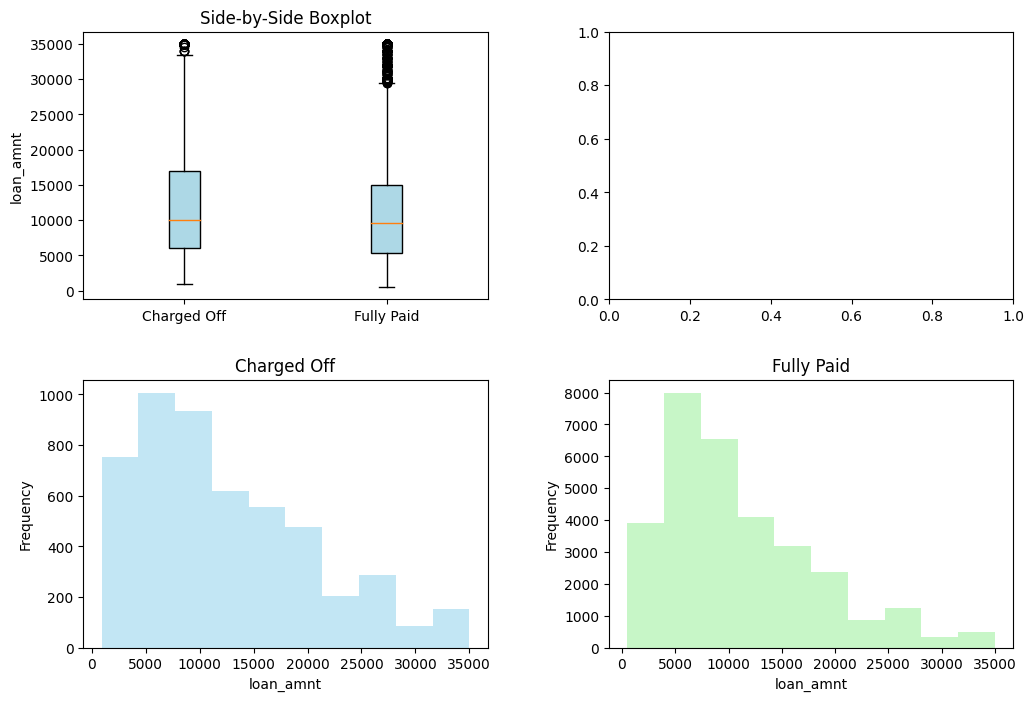

Descriptive Stats for funded_amnt
Min:
df1:900
df2:500
difference = -44.44444444444444
Max:
df1:35000
df2:35000
difference = 0.0
Mean:
df1:11927.718034727703
df2:10668.684914724183
difference = -10.555523833962447
25th percentile:
df1:6000.0
df2:5325.0
difference = -11.25
Median:
df1:10000.0
df2:9500.0
difference = -5.0
75th percentile:
df1:16000.0
df2:14600.0
difference = -8.75
Plots for funded_amnt


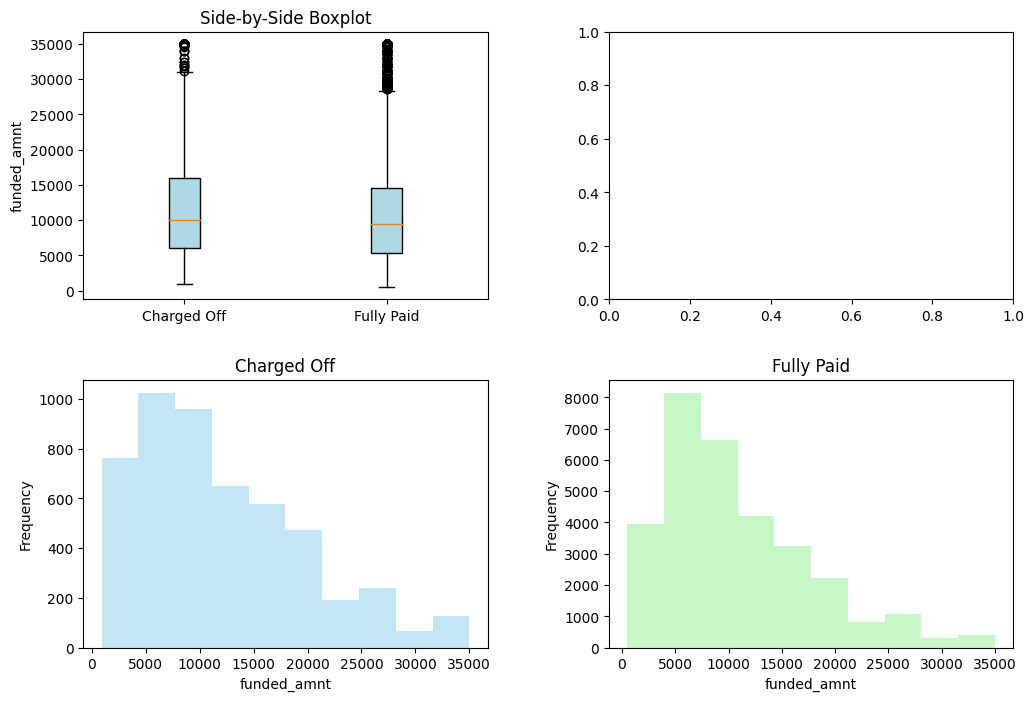

Descriptive Stats for funded_amnt_inv
Min:
df1:0.0
df2:0.0
difference = nan
Max:
df1:35000.0
df2:35000.0
difference = 0.0
Mean:
df1:11013.797531645661
df2:10155.308129067285
difference = -7.7946720929969935
25th percentile:
df1:5000.0
df2:5000.0
difference = 0.0
Median:
df1:9600.0
df2:8750.0
difference = -8.854166666666668
75th percentile:
df1:15081.25
df2:13975.0
difference = -7.335267302113552
Plots for funded_amnt_inv


C:\Users\abhir\AppData\Local\Temp\ipykernel_9708\1476265039.py:6: RuntimeWarning: invalid value encountered in scalar divide
  diff = ((y-x)/x)*100


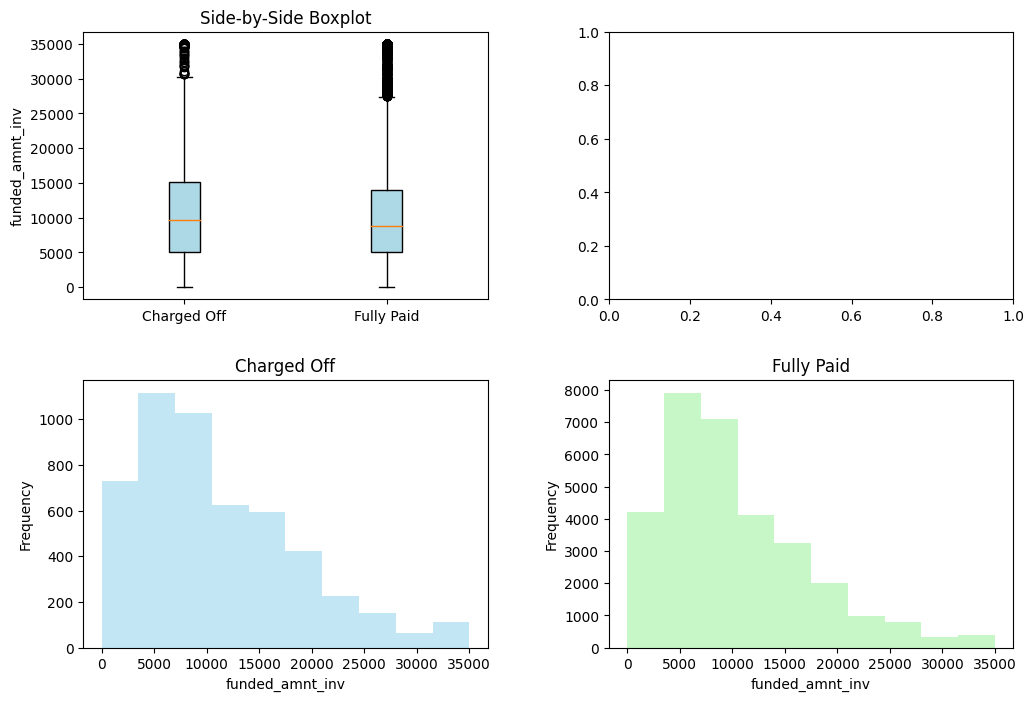

Descriptive Stats for int_rate
Min:
df1:5.42
df2:5.42
difference = 0.0
Max:
df1:24.4
df2:24.11
difference = -1.188524590163931
Mean:
df1:13.87360497237569
df2:11.646380049650192
difference = -16.053685593327888
25th percentile:
df1:11.36
df2:8.59
difference = -24.383802816901408
Median:
df1:13.61
df2:11.49
difference = -15.576781778104328
75th percentile:
df1:16.45
df2:13.99
difference = -14.954407294832823
Plots for int_rate


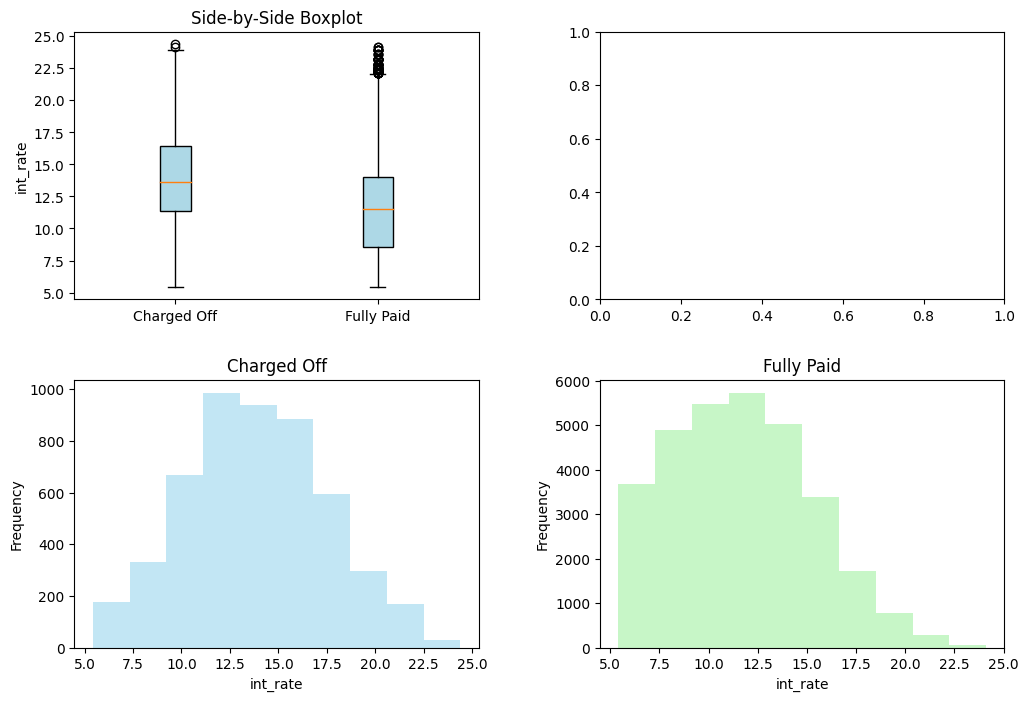

Descriptive Stats for installment
Min:
df1:22.79
df2:16.08
difference = -29.44273804300132
Max:
df1:1305.19
df2:1295.21
difference = -0.7646396310115783
Mean:
df1:340.28623125493294
df2:321.29052970951415
difference = -5.582271570426177
25th percentile:
df1:172.3875
df2:166.81
difference = -3.2354434051192733
Median:
df1:300.0
df2:278.01
difference = -7.330000000000004
75th percentile:
df1:462.055
df2:421.8
difference = -8.712166300548635
Plots for installment


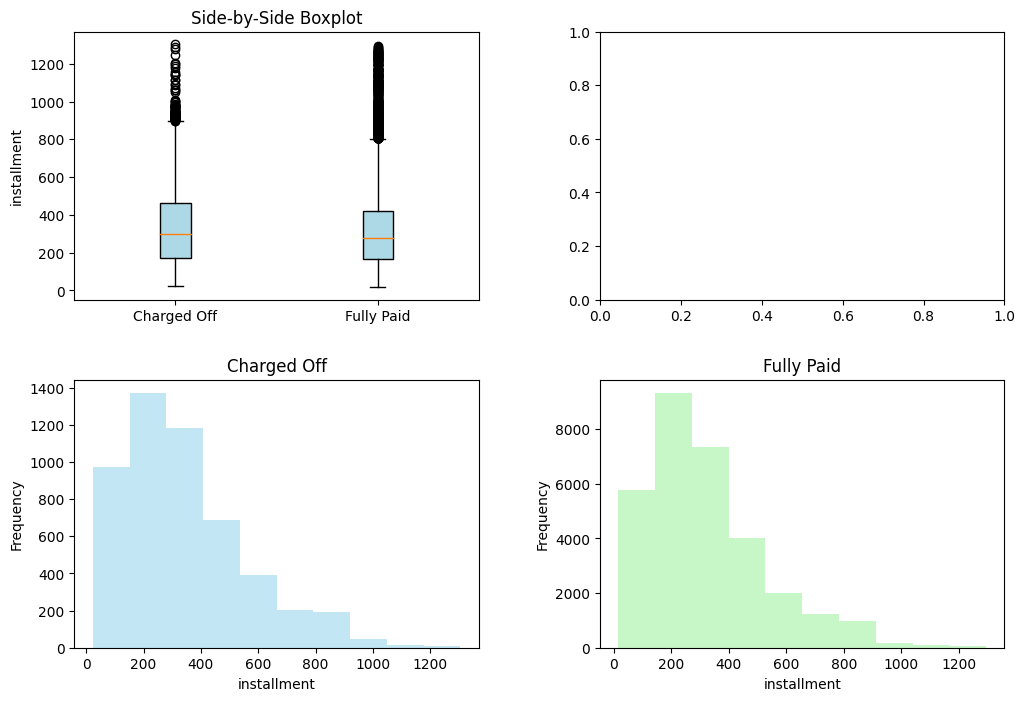

Descriptive Stats for annual_inc
Min:
df1:4080.0
df2:4000.0
difference = -1.9607843137254901
Max:
df1:1250000.0
df2:6000000.0
difference = 380.0
Mean:
df1:63121.02501381215
df2:70031.023523874
difference = 10.947221640570323
25th percentile:
df1:38400.0
df2:42000.0
difference = 9.375
Median:
df1:54000.0
df2:60000.0
difference = 11.11111111111111
75th percentile:
df1:75000.0
df2:84000.0
difference = 12.0
Plots for annual_inc


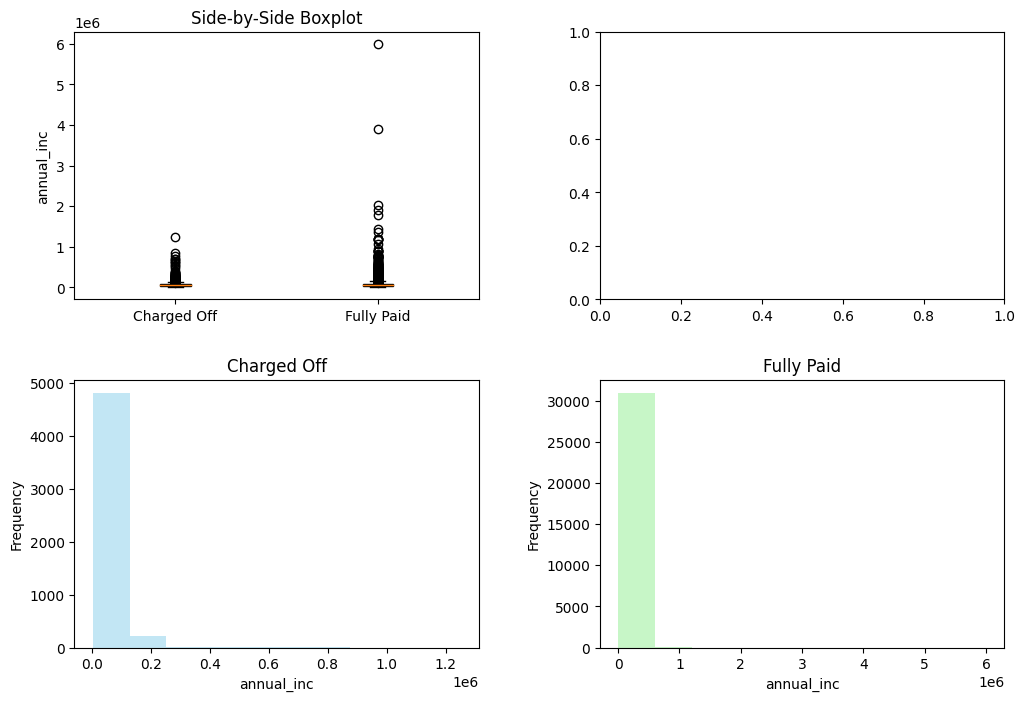

Descriptive Stats for dti
Min:
df1:0.0
df2:0.0
difference = nan
Max:
df1:29.85
df2:29.99
difference = 0.46901172529312235
Mean:
df1:14.119230465666929
df2:13.233376535448302
difference = -6.274094982532626
25th percentile:
df1:9.2775
df2:8.11
difference = -12.58420910805713
Median:
df1:14.41
df2:13.29
difference = -7.772380291464268
75th percentile:
df1:19.32
df2:18.48
difference = -4.347826086956521
Plots for dti


C:\Users\abhir\AppData\Local\Temp\ipykernel_9708\1476265039.py:6: RuntimeWarning: invalid value encountered in scalar divide
  diff = ((y-x)/x)*100


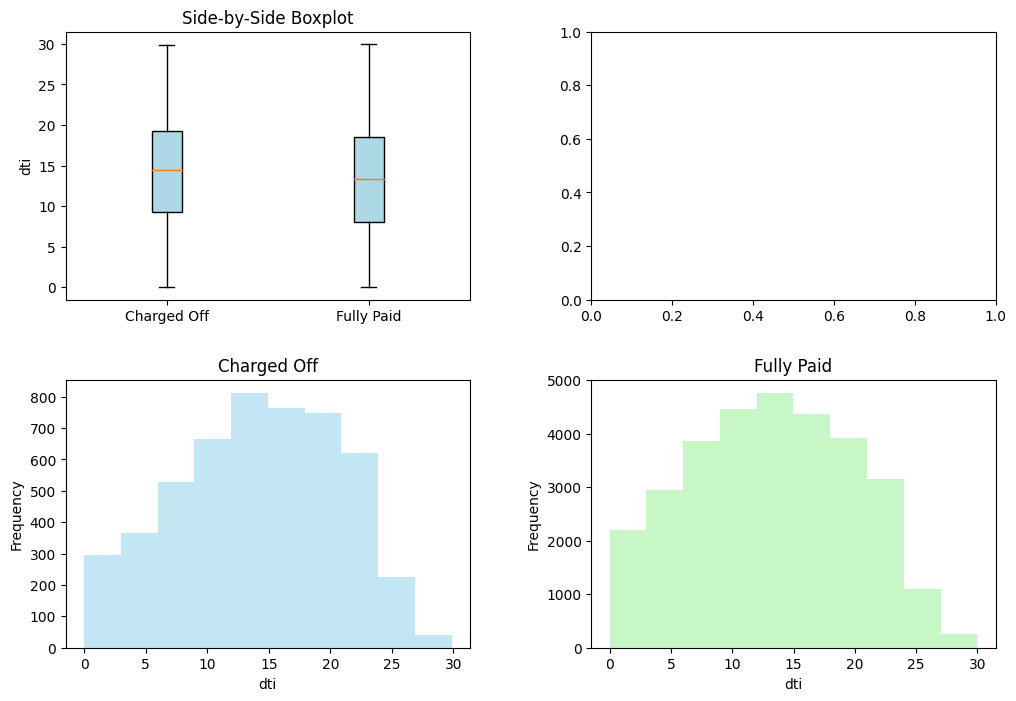

Descriptive Stats for open_acc
Min:
df1:2
df2:2
difference = 0.0
Max:
df1:38
df2:44
difference = 15.789473684210526
Mean:
df1:9.311168113654302
df2:9.335009833317214
difference = 0.25605508752386236
25th percentile:
df1:6.0
df2:6.0
difference = 0.0
Median:
df1:9.0
df2:9.0
difference = 0.0
75th percentile:
df1:12.0
df2:12.0
difference = 0.0
Plots for open_acc


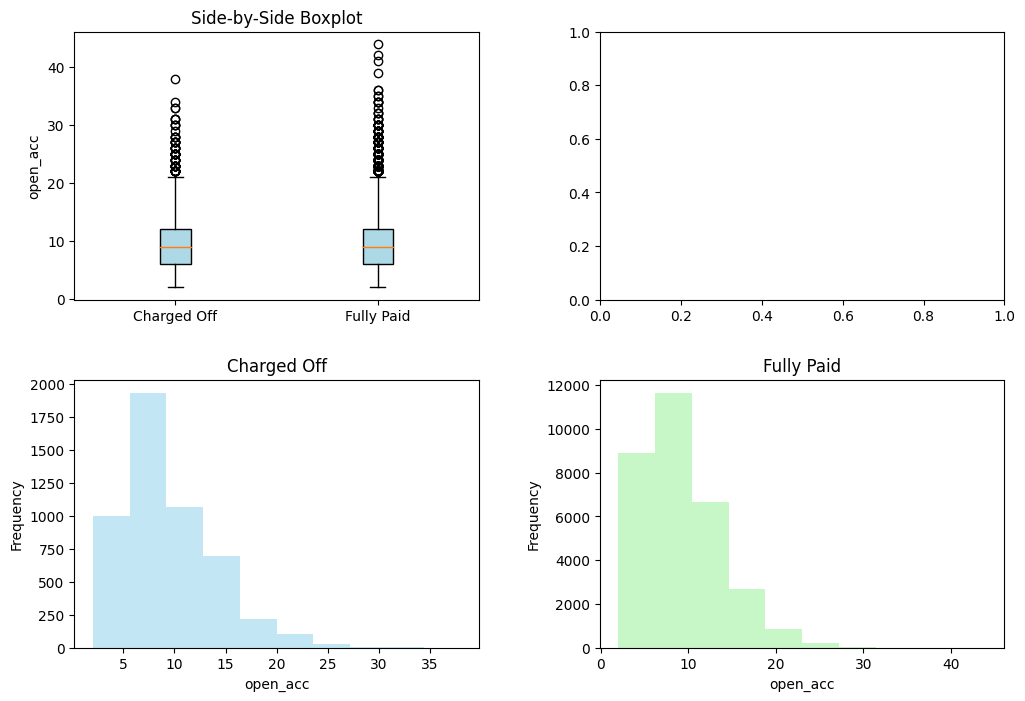

Descriptive Stats for revol_bal
Min:
df1:0
df2:0
difference = nan
Max:
df1:148829
df2:149588
difference = 0.5099812536535219
Mean:
df1:13686.732438831887
df2:13314.338878679433
difference = -2.720836122257359
25th percentile:
df1:4207.0
df2:3691.0
difference = -12.265272165438555
Median:
df1:9530.0
df2:8816.0
difference = -7.492130115424973
75th percentile:
df1:17813.0
df2:16927.0
difference = -4.973895469600853
Plots for revol_bal


C:\Users\abhir\AppData\Local\Temp\ipykernel_9708\1476265039.py:6: RuntimeWarning: invalid value encountered in scalar divide
  diff = ((y-x)/x)*100


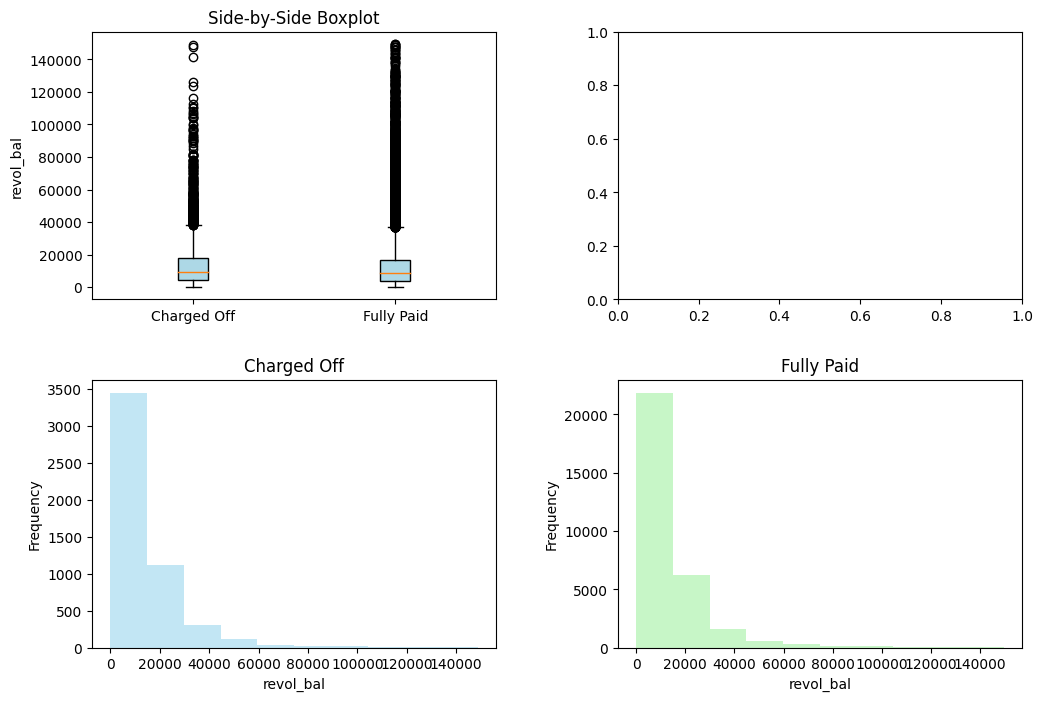

Descriptive Stats for revol_util
Min:
df1:0.0
df2:0.0
difference = nan
Max:
df1:99.9
df2:99.9
difference = 0.0
Mean:
df1:55.99479873717443
df2:47.878348002708194
difference = -14.495008317759694
25th percentile:
df1:35.2
df2:24.4
difference = -30.681818181818194
Median:
df1:59.0
df2:48.0
difference = -18.64406779661017
75th percentile:
df1:79.1
df2:71.1
difference = -10.11378002528445
Plots for revol_util


C:\Users\abhir\AppData\Local\Temp\ipykernel_9708\1476265039.py:6: RuntimeWarning: invalid value encountered in scalar divide
  diff = ((y-x)/x)*100


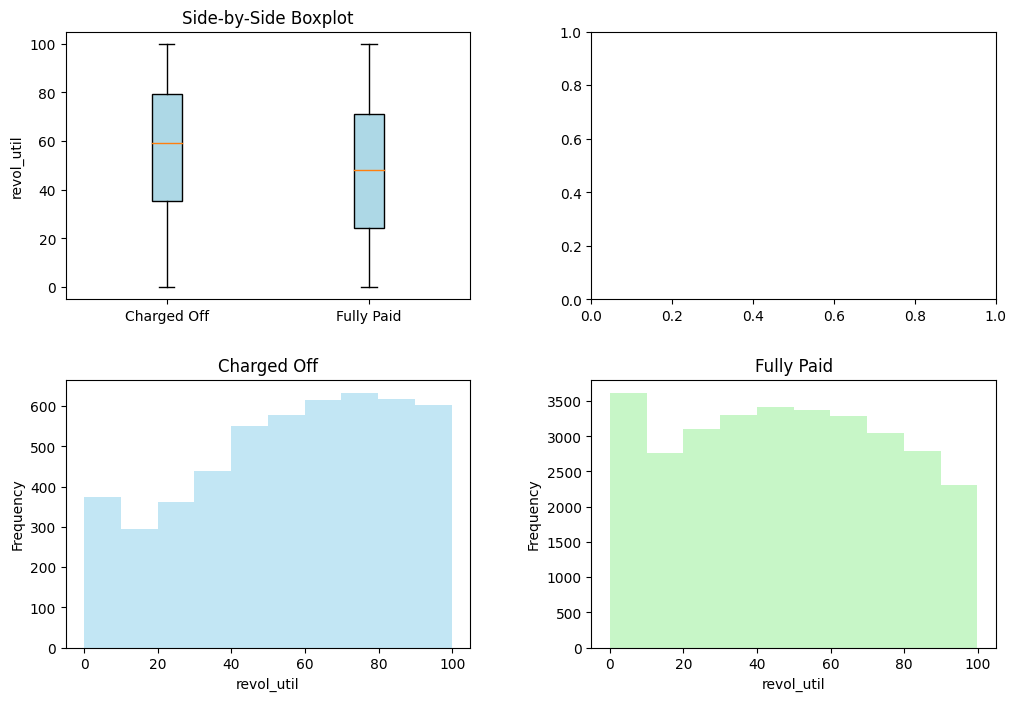

Descriptive Stats for total_acc
Min:
df1:2
df2:2
difference = 0.0
Max:
df1:70
df2:90
difference = 28.57142857142857
Mean:
df1:21.672849250197316
df2:22.22816519972918
difference = 2.5622655476497043
25th percentile:
df1:13.0
df2:14.0
difference = 7.6923076923076925
Median:
df1:20.0
df2:21.0
difference = 5.0
75th percentile:
df1:29.0
df2:29.0
difference = 0.0
Plots for total_acc


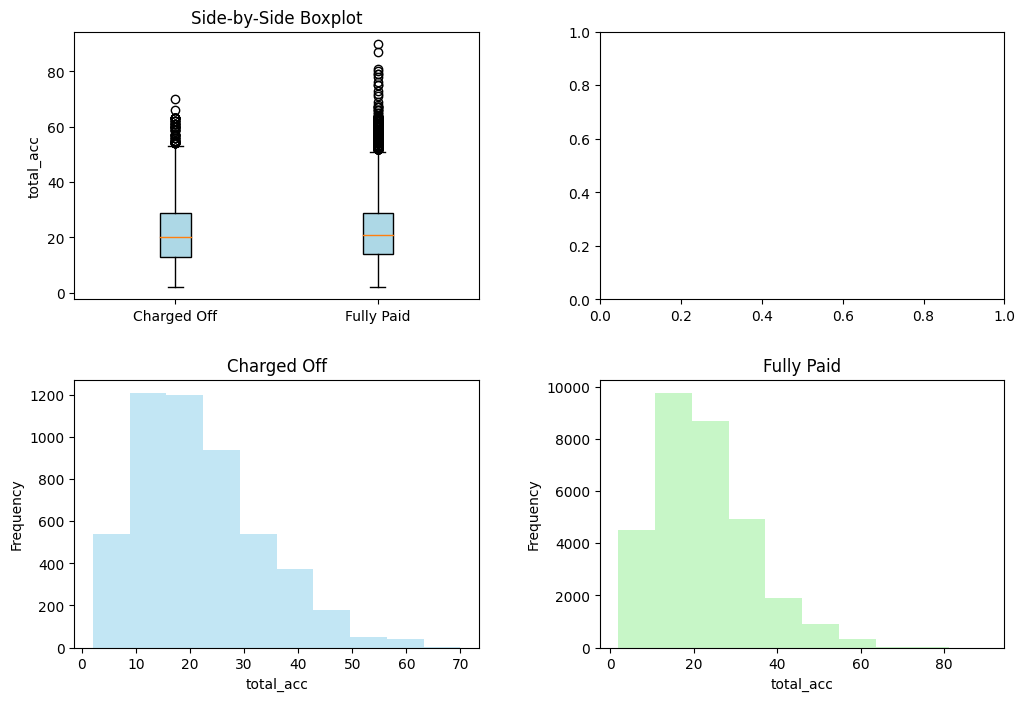

Descriptive Stats for total_pymnt
Min:
df1:33.73
df2:526.3322407
difference = 1460.4276332641568
Max:
df1:51745.45
df2:58563.67993
difference = 13.176482048180086
Mean:
df1:7014.937292828729
df2:12794.997186142098
difference = 82.39645847187033
25th percentile:
df1:2335.7675
df2:6223.886463
difference = 166.4600163757737
Median:
df1:5018.52
df2:10800.46562
difference = 115.21216653515378
75th percentile:
df1:9453.6175
df2:17091.2113
difference = 80.7901715930436
Plots for total_pymnt


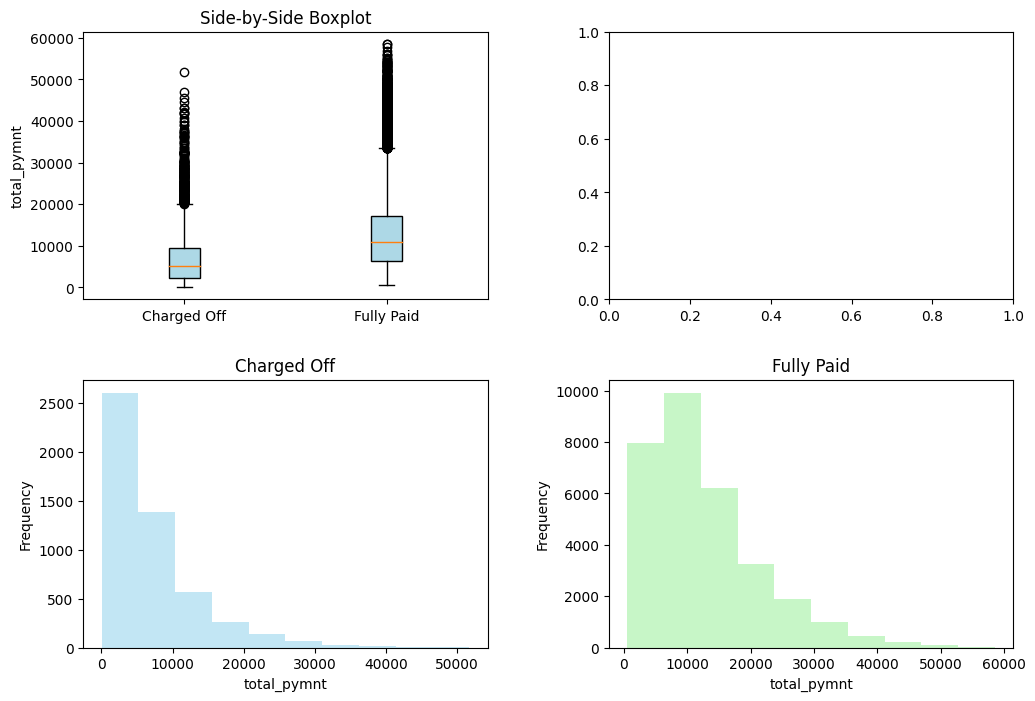

Descriptive Stats for total_pymnt_inv
Min:
df1:0.0
df2:0.0
difference = nan
Max:
df1:51671.58
df2:58563.68
difference = 13.338279959699312
Mean:
df1:6523.12066495659
df2:12167.96669278138
difference = 86.53597438646116
25th percentile:
df1:1969.0625
df2:5792.59
difference = 194.18009839707983
Median:
df1:4501.575000000001
df2:10093.91
difference = 124.23063039047439
75th percentile:
df1:8772.1725
df2:16351.88
difference = 86.40627507040016
Plots for total_pymnt_inv


C:\Users\abhir\AppData\Local\Temp\ipykernel_9708\1476265039.py:6: RuntimeWarning: invalid value encountered in scalar divide
  diff = ((y-x)/x)*100


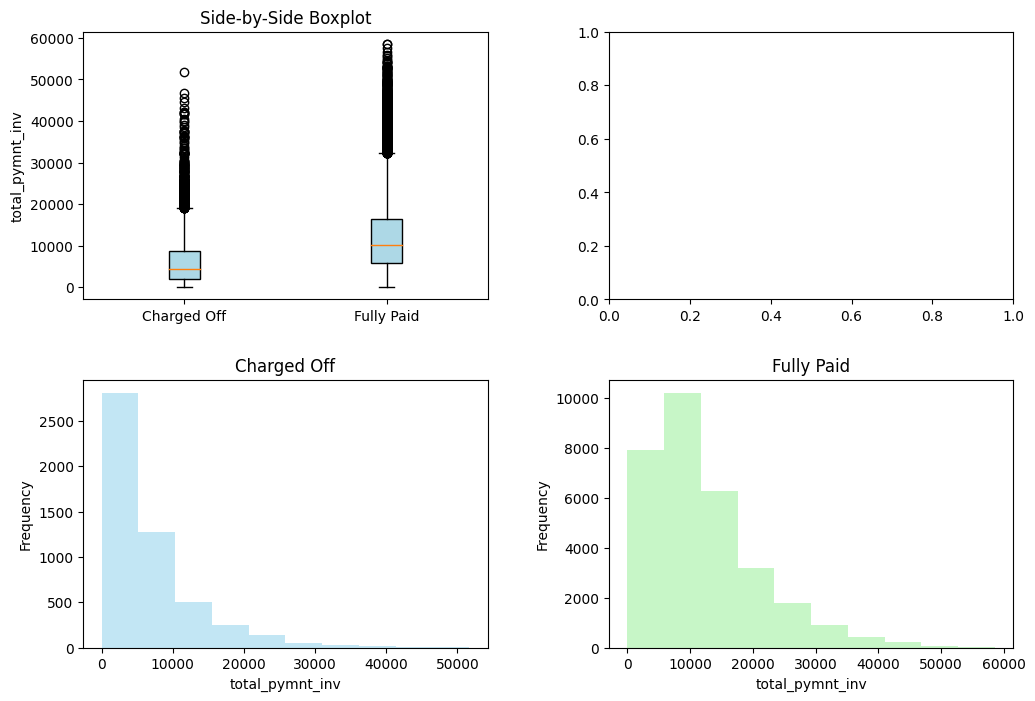

Descriptive Stats for total_rec_prncp
Min:
df1:0.0
df2:500.0
difference = inf
Max:
df1:31115.81
df2:35000.02
difference = 12.483075324087643
Mean:
df1:4072.694873717442
df2:10668.679642454139
difference = 161.95627154155218
25th percentile:
df1:1283.635
df2:5325.0
difference = 314.83755117303593
Median:
df1:2807.895
df2:9500.0
difference = 238.33173961277038
75th percentile:
df1:5478.5625
df2:14600.0
difference = 166.49326351574888
Plots for total_rec_prncp


C:\Users\abhir\AppData\Local\Temp\ipykernel_9708\1476265039.py:6: RuntimeWarning: divide by zero encountered in scalar divide
  diff = ((y-x)/x)*100


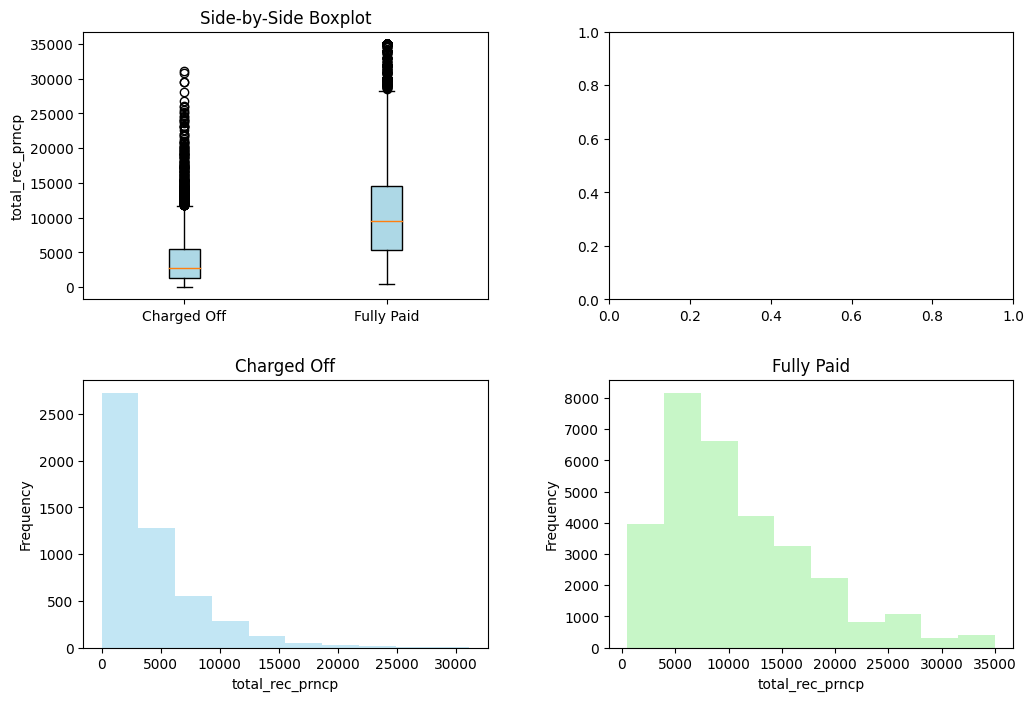

Descriptive Stats for total_rec_int
Min:
df1:11.23
df2:6.22
difference = -44.6126447016919
Max:
df1:22122.3
df2:23563.68
difference = 6.515506977122637
Mean:
df1:2258.095659037095
df2:2125.4628771318953
difference = -5.873656475729535
25th percentile:
df1:598.4175
df2:670.08
difference = 11.975334945919867
Median:
df1:1358.335
df2:1324.16
difference = -2.5159478331928393
75th percentile:
df1:2888.6400000000003
df2:2672.38
difference = -7.486568073557113
Plots for total_rec_int


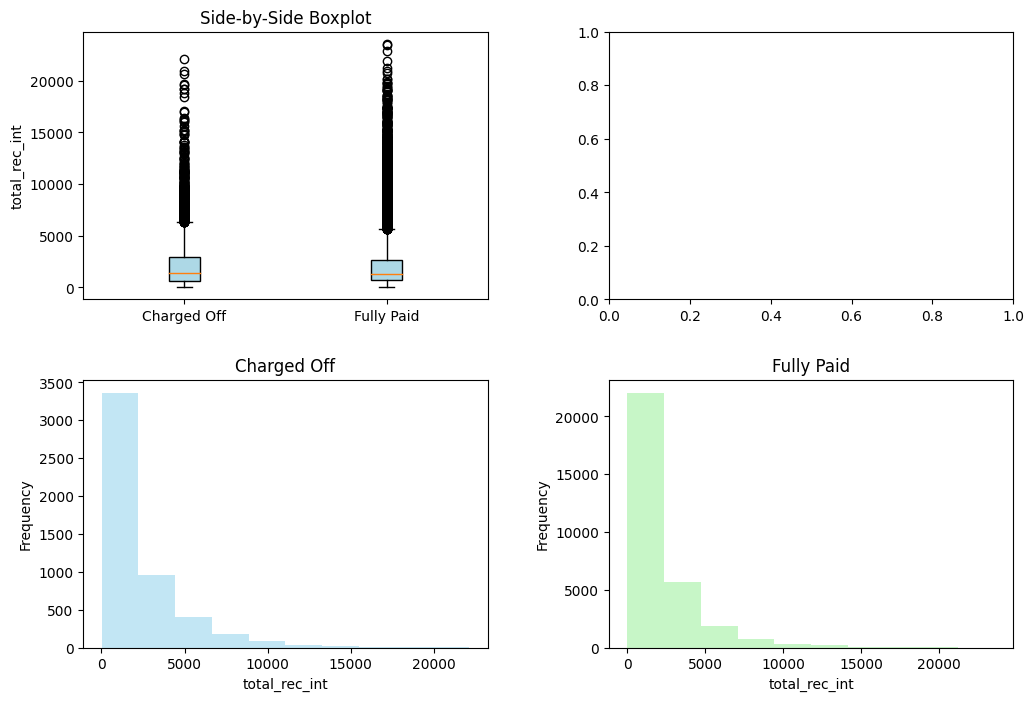

Descriptive Stats for total_rec_late_fee
Min:
df1:0.0
df2:0.0
difference = nan
Max:
df1:180.2
df2:165.69
difference = -8.052164261931182
Mean:
df1:4.358277207160616
df2:0.8547700676620241
difference = -80.38743230335042
25th percentile:
df1:0.0
df2:0.0
difference = nan
Median:
df1:0.0
df2:0.0
difference = nan
75th percentile:
df1:0.0
df2:0.0
difference = nan
Plots for total_rec_late_fee


C:\Users\abhir\AppData\Local\Temp\ipykernel_9708\1476265039.py:6: RuntimeWarning: invalid value encountered in scalar divide
  diff = ((y-x)/x)*100


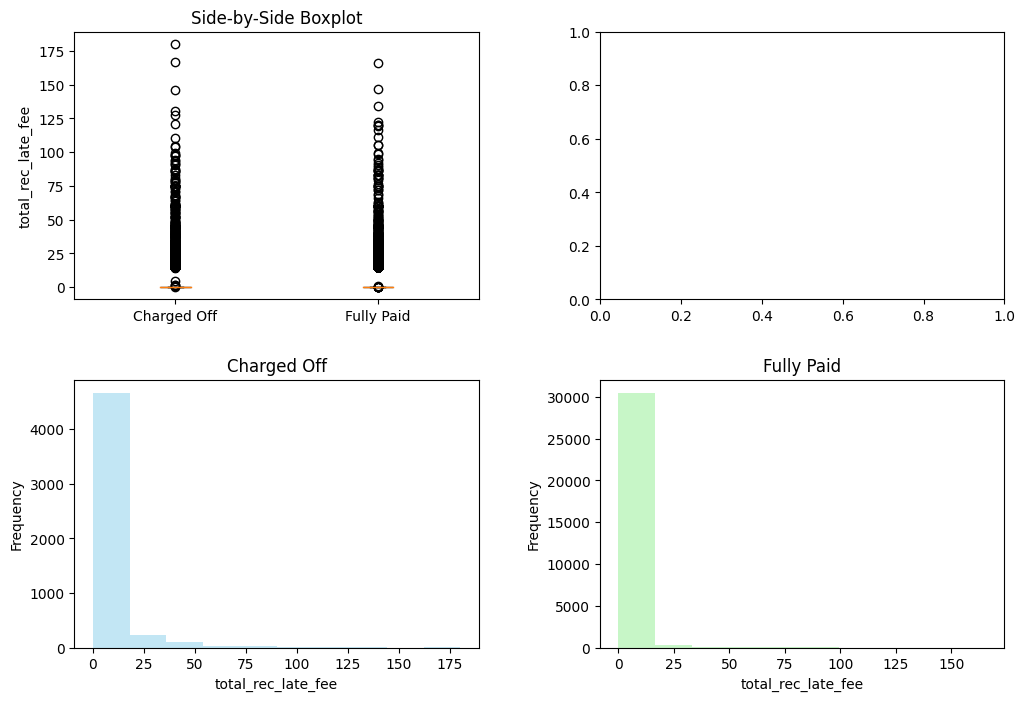

Descriptive Stats for recoveries
Min:
df1:0.0
df2:0.0
difference = nan
Max:
df1:29623.35
df2:0.0
difference = -100.0
Mean:
df1:679.7884431837214
df2:0.0
difference = -100.0
25th percentile:
df1:8.535
df2:0.0
difference = -100.0
Median:
df1:175.615
df2:0.0
difference = -100.0
75th percentile:
df1:608.1324999999999
df2:0.0
difference = -100.0
Plots for recoveries


C:\Users\abhir\AppData\Local\Temp\ipykernel_9708\1476265039.py:6: RuntimeWarning: invalid value encountered in scalar divide
  diff = ((y-x)/x)*100


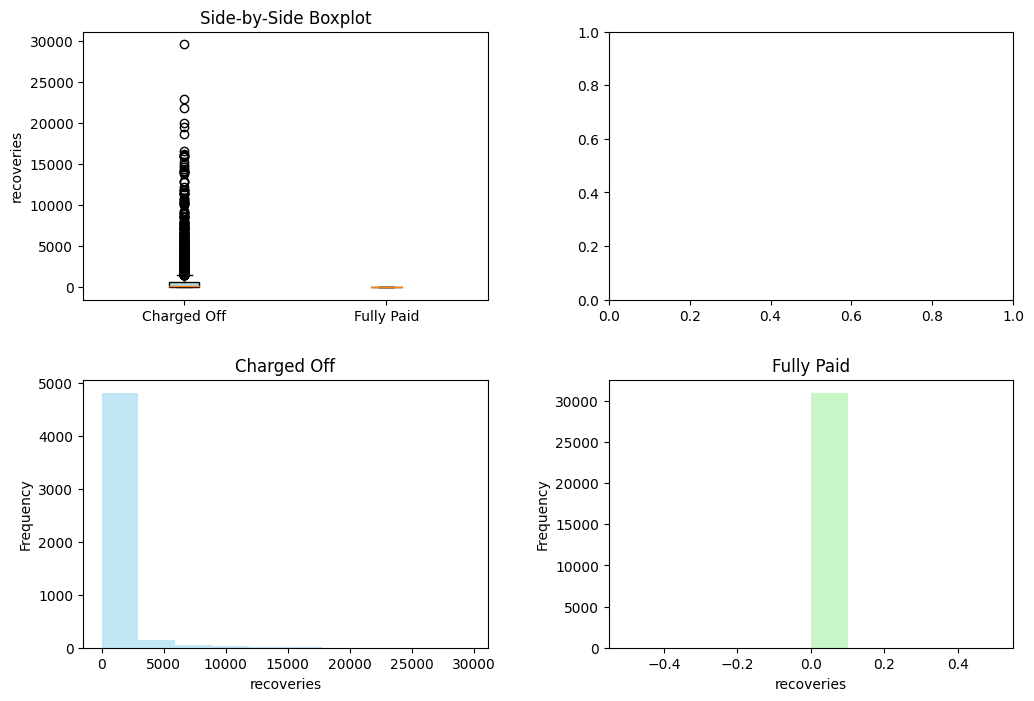

Descriptive Stats for collection_recovery_fee
Min:
df1:0.0
df2:0.0
difference = nan
Max:
df1:7002.19
df2:0.0
difference = -100.0
Mean:
df1:86.20952545382913
df2:0.0
difference = -100.0
25th percentile:
df1:0.0
df2:0.0
difference = nan
Median:
df1:2.56
df2:0.0
difference = -100.0
75th percentile:
df1:9.4325
df2:0.0
difference = -100.0
Plots for collection_recovery_fee


C:\Users\abhir\AppData\Local\Temp\ipykernel_9708\1476265039.py:6: RuntimeWarning: invalid value encountered in scalar divide
  diff = ((y-x)/x)*100


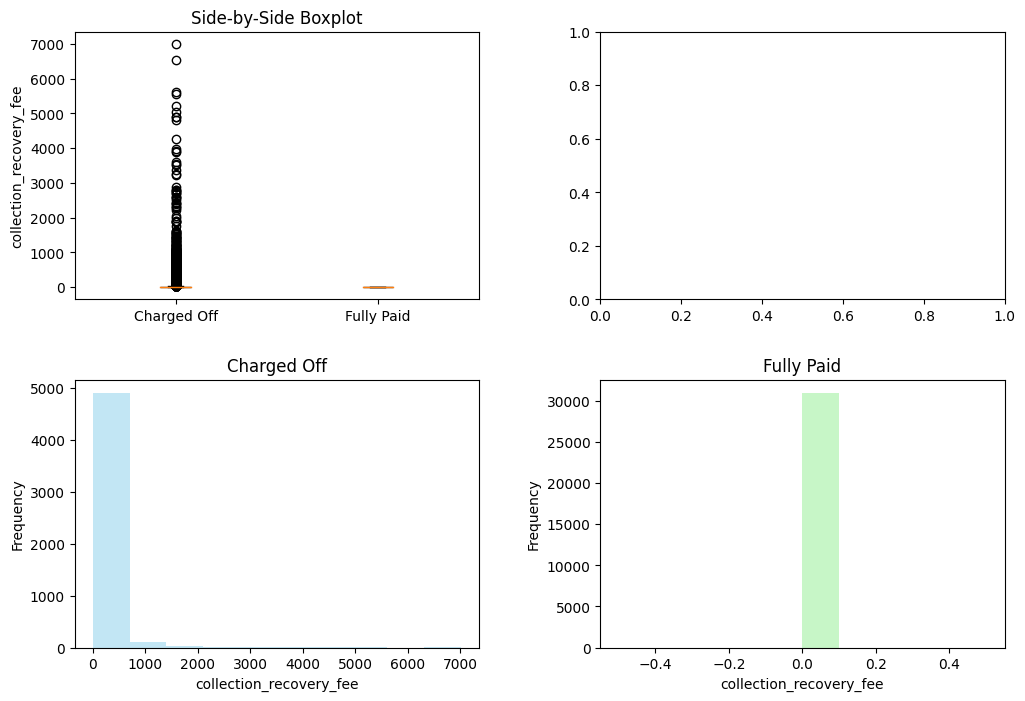

Descriptive Stats for last_pymnt_amnt
Min:
df1:0.01
df2:0.0
difference = -100.0
Max:
df1:12818.38
df2:36115.2
difference = 181.74543116992942
Mean:
df1:332.3766515390687
df2:3190.2832420930454
difference = 859.8397562886719
25th percentile:
df1:120.0
df2:260.69
difference = 117.24166666666666
Median:
df1:245.685
df2:892.54
difference = 263.2863219162749
75th percentile:
df1:414.94
df2:4329.13
difference = 943.3146961006411
Plots for last_pymnt_amnt


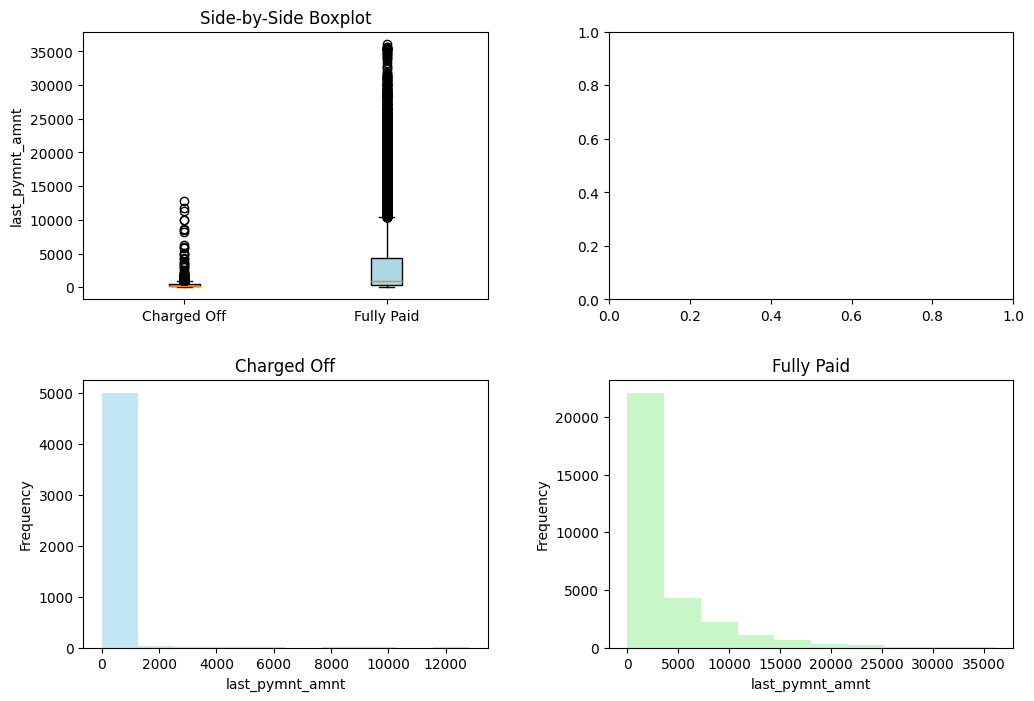

In [51]:
for col in numeric_cols:
    print(f"Descriptive Stats for {col}")
    compare_numerical_column(df_dflt,df_not_dflt, col)
    print(f"Plots for {col}")
    plot_numerical_cols(df_dflt,df_not_dflt, col)

In [52]:
import seaborn as sns

C:\Users\abhir\AppData\Local\Temp\ipykernel_9708\1036244562.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='YlGnBu', annot = True)


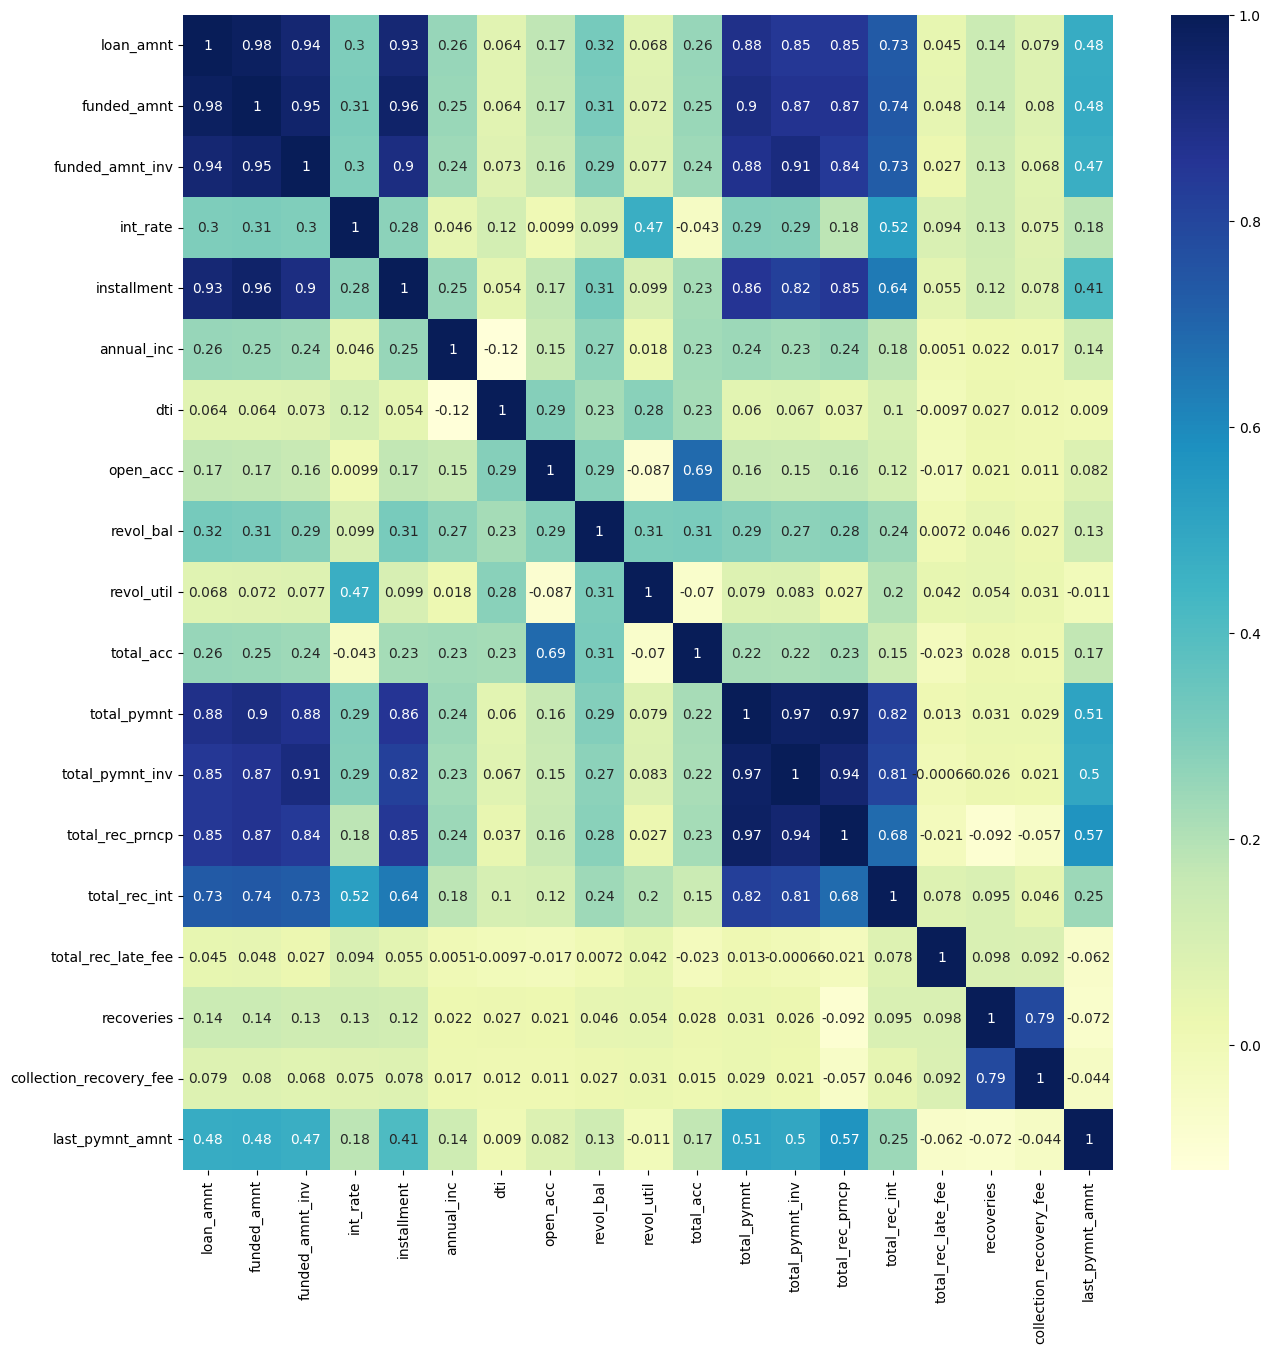

In [53]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), cmap='YlGnBu', annot = True)
plt.show()

In [54]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
count,36085.000000,36085.000000,36085.000000,36085.000000,36085.000000,3.608500e+04,36085.000000,36085.000000,36085.000000,36085.000000,36085.000000,36085.000000,36085.000000,36085.000000,36085.000000,36085.000000,36085.000000,36085.000000,36085.000000
mean,11109.677844,10845.511293,10275.879677,11.959185,323.958403,6.906054e+04,13.357791,9.331661,13366.640127,49.018272,22.150173,11983.209919,11375.169695,9742.298852,2144.090643,1.346824,95.473682,12.107798,2788.901211
std,7311.127594,7057.126336,6992.473573,3.683003,207.194434,6.462414e+04,6.646322,4.394178,15724.236755,28.252928,11.408710,8788.077626,8681.630071,6980.499325,2394.990217,7.262307,690.317198,142.978770,4501.598508
min,500.000000,500.000000,0.000000,5.420000,16.080000,4.000000e+03,0.000000,2.000000,0.000000,0.000000,2.000000,33.730000,0.000000,0.000000,6.220000,0.000000,0.000000,0.000000,0.000000
25%,5500.000000,5400.000000,5000.000000,8.940000,167.730000,4.100400e+04,8.260000,6.000000,3760.000000,25.700000,14.000000,5598.284713,5136.120000,4725.000000,660.870000,0.000000,0.000000,0.000000,223.360000
50%,10000.000000,9600.000000,8898.698608,11.830000,280.620000,6.000000e+04,13.460000,9.000000,8907.000000,49.500000,20.000000,9831.740003,9225.940000,8000.000000,1328.920000,0.000000,0.000000,0.000000,593.550000
75%,15000.000000,15000.000000,14025.000000,14.420000,426.490000,8.224800e+04,18.610000,12.000000,17054.000000,72.500000,29.000000,16254.605160,15451.830000,13343.220000,2708.070000,0.000000,0.000000,0.000000,3560.680000
max,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,6.000000e+06,29.990000,44.000000,149588.000000,99.900000,90.000000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000


In [58]:
category = df_metadata[(df_metadata['data_type'] == 'object') & (df_metadata['unique_count'] <= 50)]['column_name'].to_list()
category

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'loan_status',
 'purpose',
 'addr_state',
 'delinq_2yrs',
 'inq_last_6mths',
 'pub_rec',
 'pub_rec_bankruptcies']

In [59]:
for col in category:
    get_perc_pivot_table(df, col)

Bivariate analysis of spread of values of term vs loan_status
loan_status  Charged Off  Fully Paid
term                                
 36 months     56.274665   78.118451
 60 months     43.725335   21.881549
Bivariate analysis of spread of values of grade vs loan_status
loan_status  Charged Off  Fully Paid
grade                               
A              10.280189   28.236129
B              25.355170   31.128091
C              23.796369   19.872973
D              19.988161   12.141729
E              13.003157    5.987039
F               5.741910    2.018248
G               1.835043    0.615791
Bivariate analysis of spread of values of sub_grade vs loan_status
loan_status  Charged Off  Fully Paid
sub_grade                           
A1              0.453828    3.204694
A2              1.243094    4.255731
A3              1.657459    5.110101
A4              3.176796    8.163265
A5              3.749013    7.502337
B1              2.920284    4.881194
B2              3.946330    5.3

In [60]:
for col in category:
    get_pivot_table(df, col, 'installment', 'median')

Bivariate analysis of spread of values of term vs loan_status
loan_status  Charged Off  Fully Paid
term                                
 36 months       263.425      264.45
 60 months       348.855      318.05
Bivariate analysis of spread of values of grade vs loan_status
loan_status  Charged Off  Fully Paid
grade                               
A                 214.93     225.290
B                 260.97     278.970
C                 278.31     277.510
D                 306.35     323.355
E                 377.33     386.150
F                 526.74     457.275
G                 535.24     619.220
Bivariate analysis of spread of values of sub_grade vs loan_status
loan_status  Charged Off  Fully Paid
sub_grade                           
A1               231.750     182.620
A2               186.310     190.305
A3               219.360     213.500
A4               210.100     248.880
A5               224.835     256.760
B1               249.225     258.835
B2               239.480     27